In [1]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import make_column_transformer
import joblib
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv("C:/Users/HP/OneDrive/Documents/DS Projects/used-car-prediction-model/Data/model_dataset.csv")

In [9]:
data

,Unnamed: 0,vehicleType,yearOfRegistration,gearbox,horsepower,kilometer,fuelType,brand,notRepairedDamage,price_log,adTimeLength
0,1,3,12,0,190,125000,3,Luxury,0,9.814656,14.074190
1,2,7,19,1,163,125000,3,Luxury,1,9.190138,22.533171
2,3,4,22,0,75,150000,1,Economic,1,7.313220,0.736308
3,4,4,15,0,69,90000,3,Economic,1,8.188689,6.428715
4,6,2,19,0,109,150000,1,Economic,1,7.696213,4.762951
...,...,...,...,...,...,...,...,...,...,...,...
258186,371520,6,19,0,225,150000,1,Economic,0,8.070906,0.864387
258187,371524,2,23,1,101,125000,1,Economic,1,7.089243,6.761944
258188,371525,1,27,0,102,150000,3,Economic,1,9.126959,19.302384
258189,371526,5,21,0,100,150000,3,Economic,1,8.131531,4.531493


In [10]:
vehicle_map = {key: i for i, key in enumerate(data['vehicleType'].unique())}
vehicle_map['other'] = 8
gearbox_map = {key: i for i, key in enumerate(data['gearbox'].unique())}
fueltype_map = {key: i for i, key in enumerate(data['fuelType'].unique())}
fueltype_map['other'] = 7
damaged_map = {key: i for i, key in enumerate(data['notRepairedDamage'].unique())}
brand_map = {key: i for i, key in enumerate(data['brand'].unique())}

In [11]:
data['vehicleType'] =data['vehicleType'].map(vehicle_map)
data['gearbox'] =data['gearbox'].map(gearbox_map)
data['fuelType'] =data['fuelType'].map(fueltype_map)
data['notRepairedDamage'] =data['notRepairedDamage'].map(damaged_map)
data['brand'] =data['brand'].map(brand_map)

In [12]:
data

,Unnamed: 0,vehicleType,yearOfRegistration,gearbox,horsepower,kilometer,fuelType,brand,notRepairedDamage,price_log,adTimeLength
0,1,0,12,0,190,125000,0,0,0,9.814656,14.074190
1,2,1,19,1,163,125000,0,0,1,9.190138,22.533171
2,3,2,22,0,75,150000,1,1,1,7.313220,0.736308
3,4,2,15,0,69,90000,0,1,1,8.188689,6.428715
4,6,3,19,0,109,150000,1,1,1,7.696213,4.762951
...,...,...,...,...,...,...,...,...,...,...,...
258186,371520,5,19,0,225,150000,1,1,0,8.070906,0.864387
258187,371524,3,23,1,101,125000,1,1,1,7.089243,6.761944
258188,371525,4,27,0,102,150000,0,1,1,9.126959,19.302384
258189,371526,6,21,0,100,150000,0,1,1,8.131531,4.531493


In [13]:
X = data.drop(columns=['price_log', 'Unnamed: 0'])
y = data.price_log

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Model
lgb_model = LGBMRegressor(
    colsample_bytree= 1.0,
    learning_rate= 0.1,
    max_depth= 8,
    min_child_weight= 1,
    n_estimators= 200,
    num_leaves= 100,
    subsample= 0.6,
    random_state=42
)

# Encoder
le = LabelEncoder()

# Scaling Features
scaler = StandardScaler()

In [16]:
lgb_model.fit(X_train, y_train, categorical_feature=[])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 180733, number of used features: 9
[LightGBM] [Info] Start training from score 8.458918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor(max_depth=8, min_child_weight=1, n_estimators=200, num_leaves=100,
              random_state=42, subsample=0.6)

In [17]:
y_pred = lgb_model.predict(X_test)

print(f'r_squared: {lgb_model.score(X_test, y_test)}')
print(f'mse: {mean_squared_error(y_pred=y_pred, y_true=y_test)}')
print(f'mae: {mean_absolute_error(y_pred=y_pred, y_true=y_test)}')

r_squared: 0.8656700396724728
mse: 0.10814412621084227
mae: 0.2419278331741669


In [ ]:
# joblib.dump(lgb_model, 'new_model.joblib')

['new_model.joblib']

In [19]:
columns = ['vehicleType', 'yearOfRegistration', 'gearbox', 'horsepower', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'adTimeLength']
test = pd.DataFrame([np.array([0,0,0,0,0,0,2,0,0])], columns= columns)

# for col in test.columns:
#     test[col] = test[col].astype('int64')
# y_pred = lgb_model.predict(test)

# print(f'r_squared: {lgb_model.score(X_test, y_test)}')
# print(f'mse: {mean_squared_error(y_pred=y_pred, y_true=y_test)}')
# print(f'mae: {mean_absolute_error(y_pred=y_pred, y_true=y_test)}')

In [20]:
# model_new = joblib.load('new_model.joblib')
# y_pred = model_new.predict(test)
# y_pred

# Testing Model Performance

In [21]:
np.exp(y_test)

64365     12000.0
218997    39995.0
248103     9600.0
232469     1200.0
155896    11500.0
           ...   
158820     1299.0
239355    11450.0
216237     2750.0
57834      7800.0
165562     1590.0
Name: price_log, Length: 77458, dtype: float64

In [22]:
rr= pd.DataFrame(
    {
        'Actual Values': np.exp(y_test),
        'Predicted Values': np.exp(y_pred)
    }
)

rr['rmse']=rr['Actual Values']-rr['Predicted Values']
rr.head()

,Actual Values,Predicted Values,rmse
64365,12000.0,16666.606957,-4666.606957
218997,39995.0,39039.135154,955.864846
248103,9600.0,11184.016955,-1584.016955
232469,1200.0,1248.208879,-48.208879
155896,11500.0,10395.672327,1104.327673


In [23]:
rr.rmse.mean()

317.20275115672644

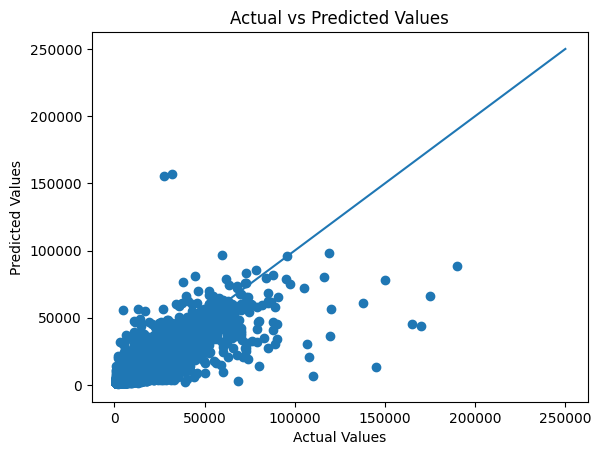

In [24]:
plt.scatter(np.exp(y_test), np.exp(y_pred))
plt.plot(range(250000),range(250000))
# plt.plot()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values');

The model is off by an average value of 400 Euros 